# Cleaning Modes With Rational Filters

In [5]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [45]:
import matplotlib.pyplot as pl
import numpy as np
import qnm_filter
import seaborn as sns
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from matplotlib.ticker import MultipleLocator
from gwpy.timeseries import TimeSeries
import astropy.units as u
from scipy.special import logsumexp

In [30]:
results_dir = 'data/'
file_name = '220+221_t=1M.txt'

In [31]:
filter_str = file_name.split('_')[0]
time_str = file_name.split('=')[1].split('M')[0]

In [38]:
likelihood_data = np.loadtxt(results_dir+filter_str+'/'+file_name)

In [39]:
delta_mass = 0.2
delta_chi = 0.005
massspace = np.arange(30, 100, delta_mass)
chispace = np.arange(0., 0.95, delta_chi)
mass_grid, chi_grid = np.meshgrid(massspace, chispace)

Interate over the samplings

In [41]:
evidence = logsumexp(likelihood_data)
credible_region = qnm_filter.find_credible_region(likelihood_data)

Plot 2d contours

In [65]:
IMR_analysis = [63.06, 0.68, [[1.23], [1.8]], [[0.02], [0.02]]]
cbar_levels = np.linspace(-480, -375, 22, endpoint=True)

Text(0.5, 1.0, 'S230814 \n $t_{init}$ + 1M, filters = 220+221')

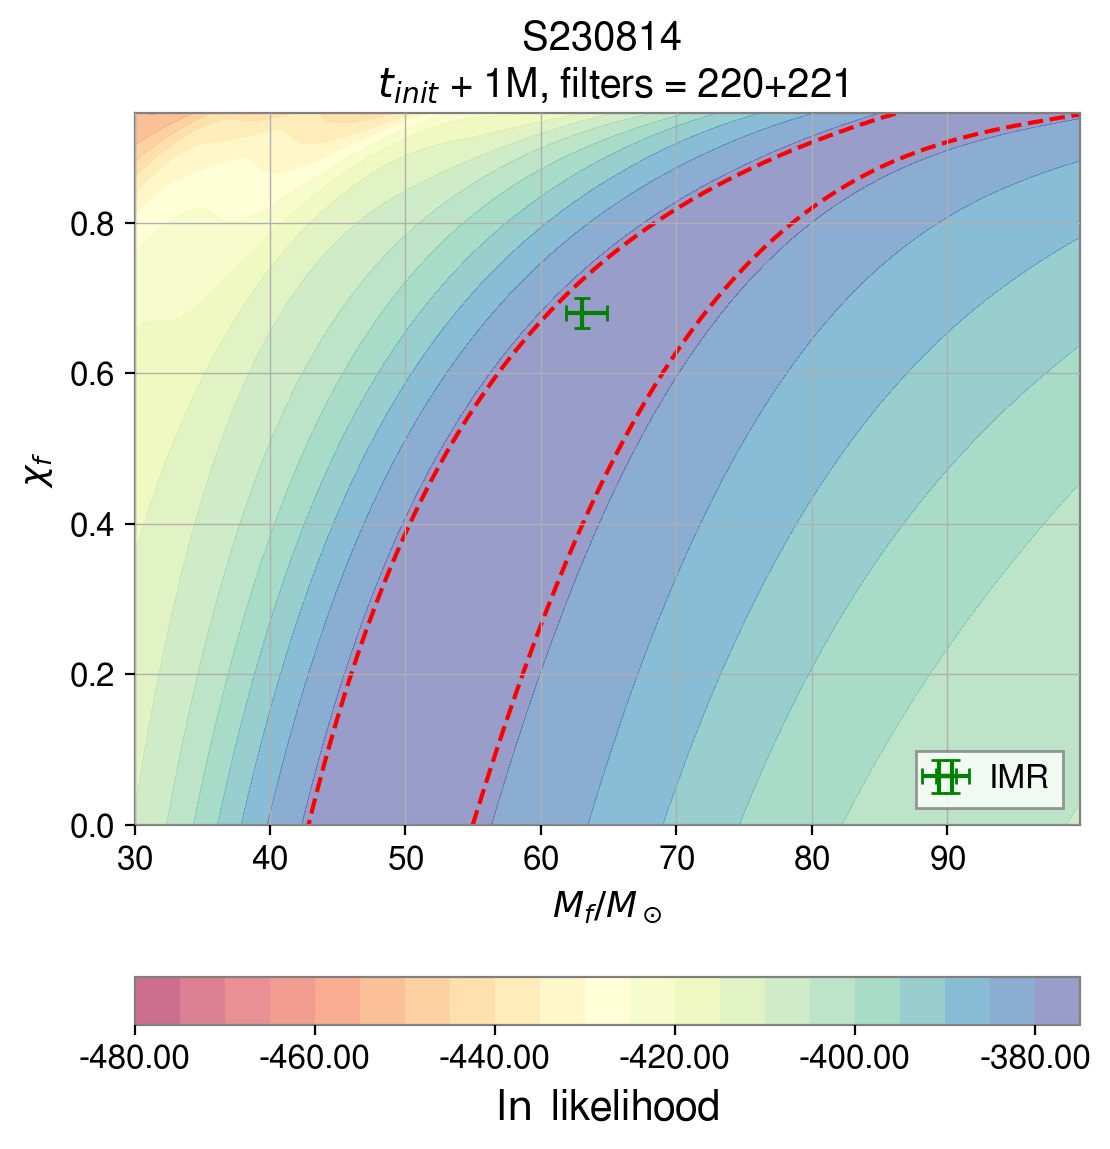

In [66]:
pl.rc('figure', figsize=(6.1, 6.6))
fig, ax = pl.subplots()
contours = ax.contourf(mass_grid, chi_grid, likelihood_data, 20, 
                       cmap='Spectral', levels = cbar_levels,
                       origin='lower', alpha=0.6, linestyles='--')
dotted = ax.contour(mass_grid, chi_grid, likelihood_data, [credible_region], colors = 'red', \
                   linestyles ='--')
ax.errorbar(x=IMR_analysis[0], y=IMR_analysis[1], xerr=IMR_analysis[2], yerr=IMR_analysis[3], 
           capsize = 3, c='g', label='IMR')
# ax.plot(np.NaN, np.NaN, '-', color='none', label='ln(Evidence) = %.1F' % evidence)


# coloarbar
cbar=fig.colorbar(contours, orientation="horizontal", 
                  pad=0.15, format='%3.2f')
cbar.set_label(r'$\ln$ likelihood', fontsize=15)
cbar.set_ticks(cbar_levels[::4])

pl.xlabel(r'$M_f/M_\odot$', fontsize=13)
pl.ylabel(r'$\chi_f$', fontsize=13)
pl.legend(loc = 'lower right')

ax.set_title('S230814 \n $t_{init}$ + ' + time_str +
             'M, filters = ' + filter_str)
# pl.savefig('./gif_imgs/220+1_t={}M.png'.format(time_offset))

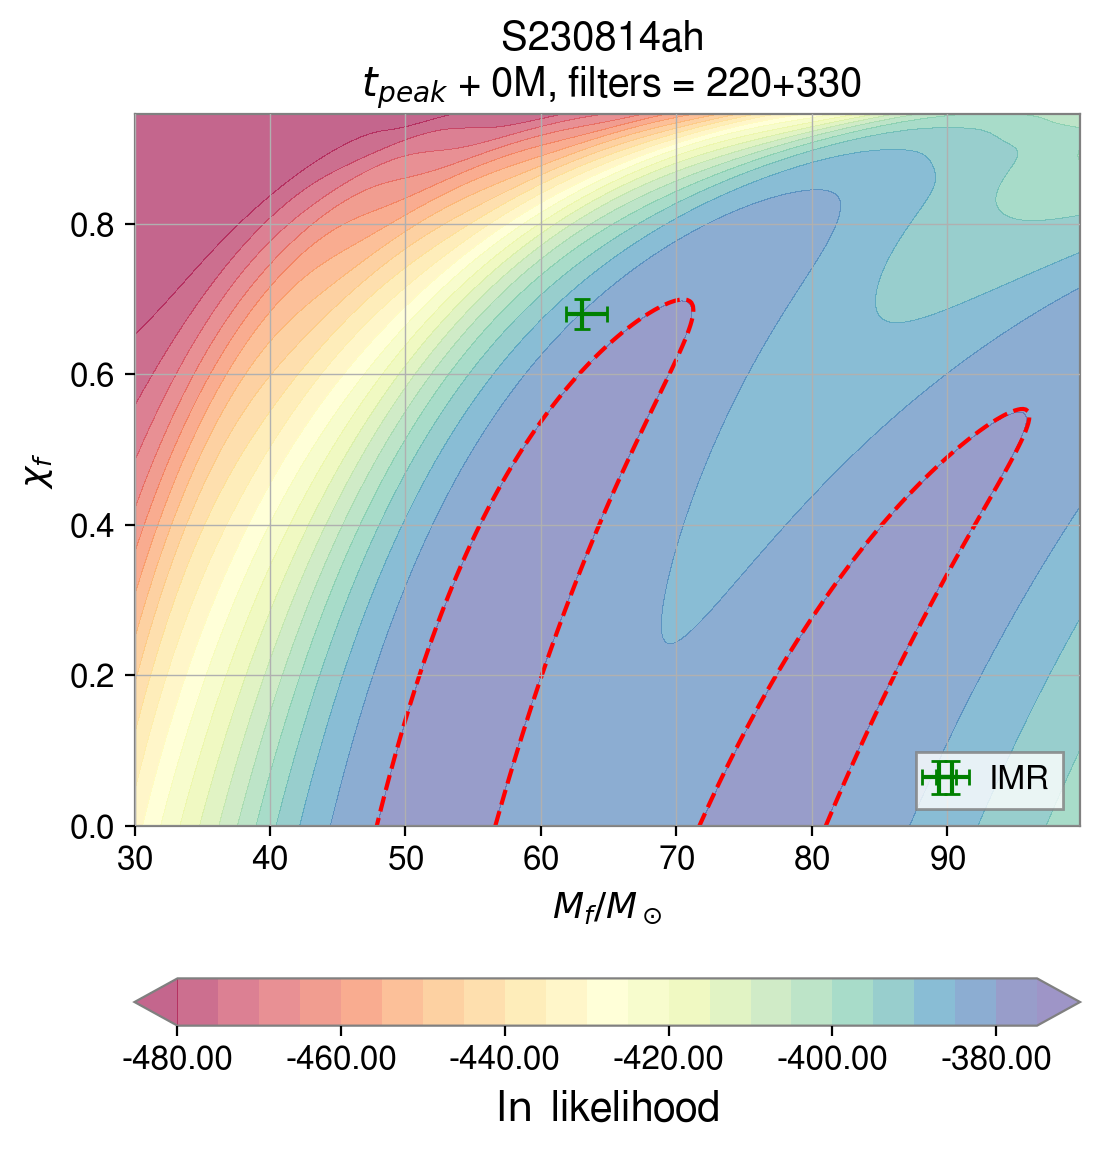

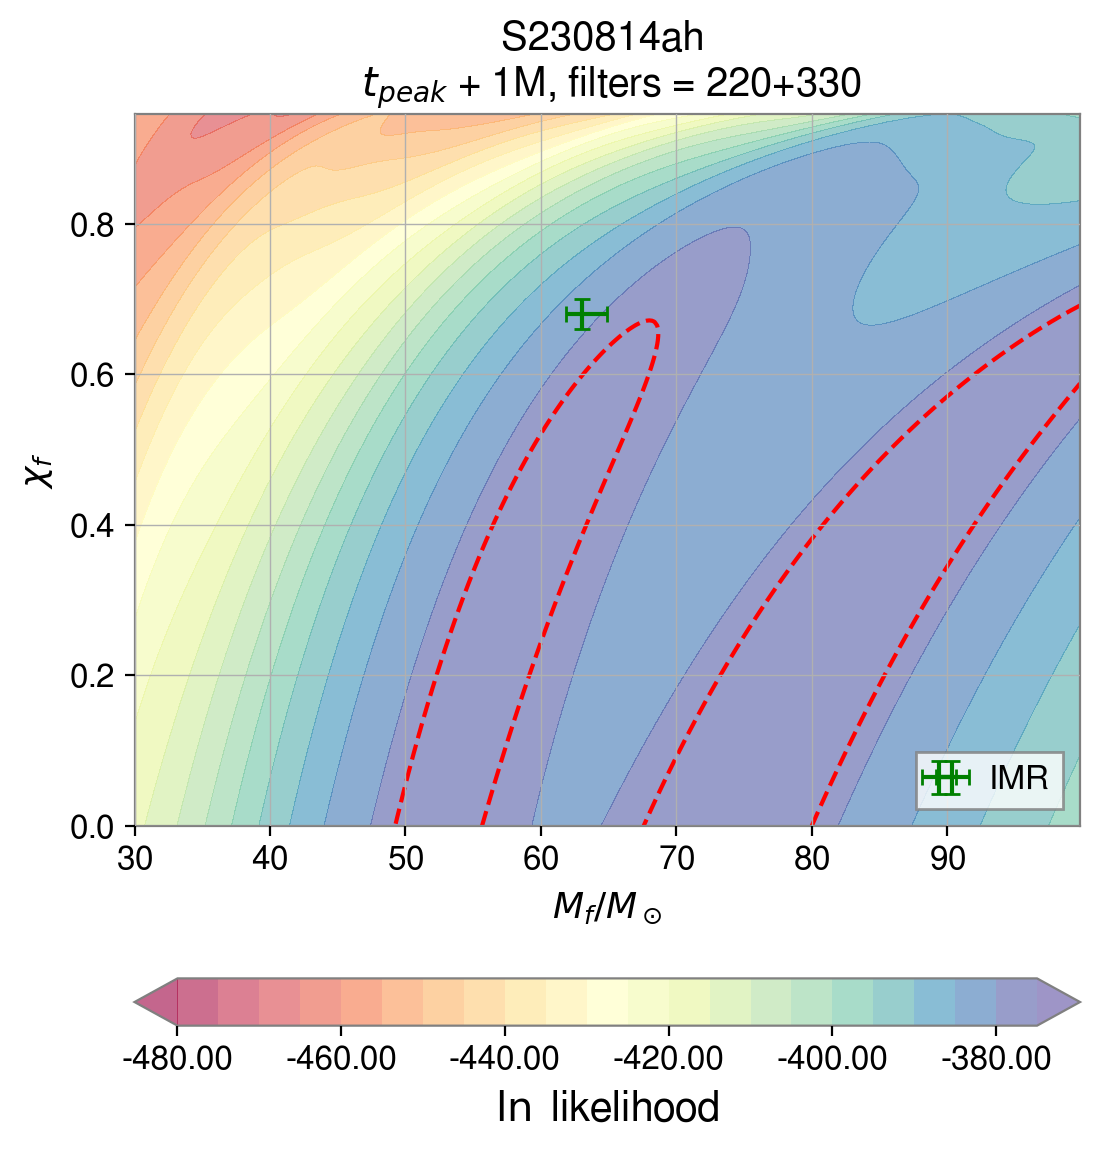

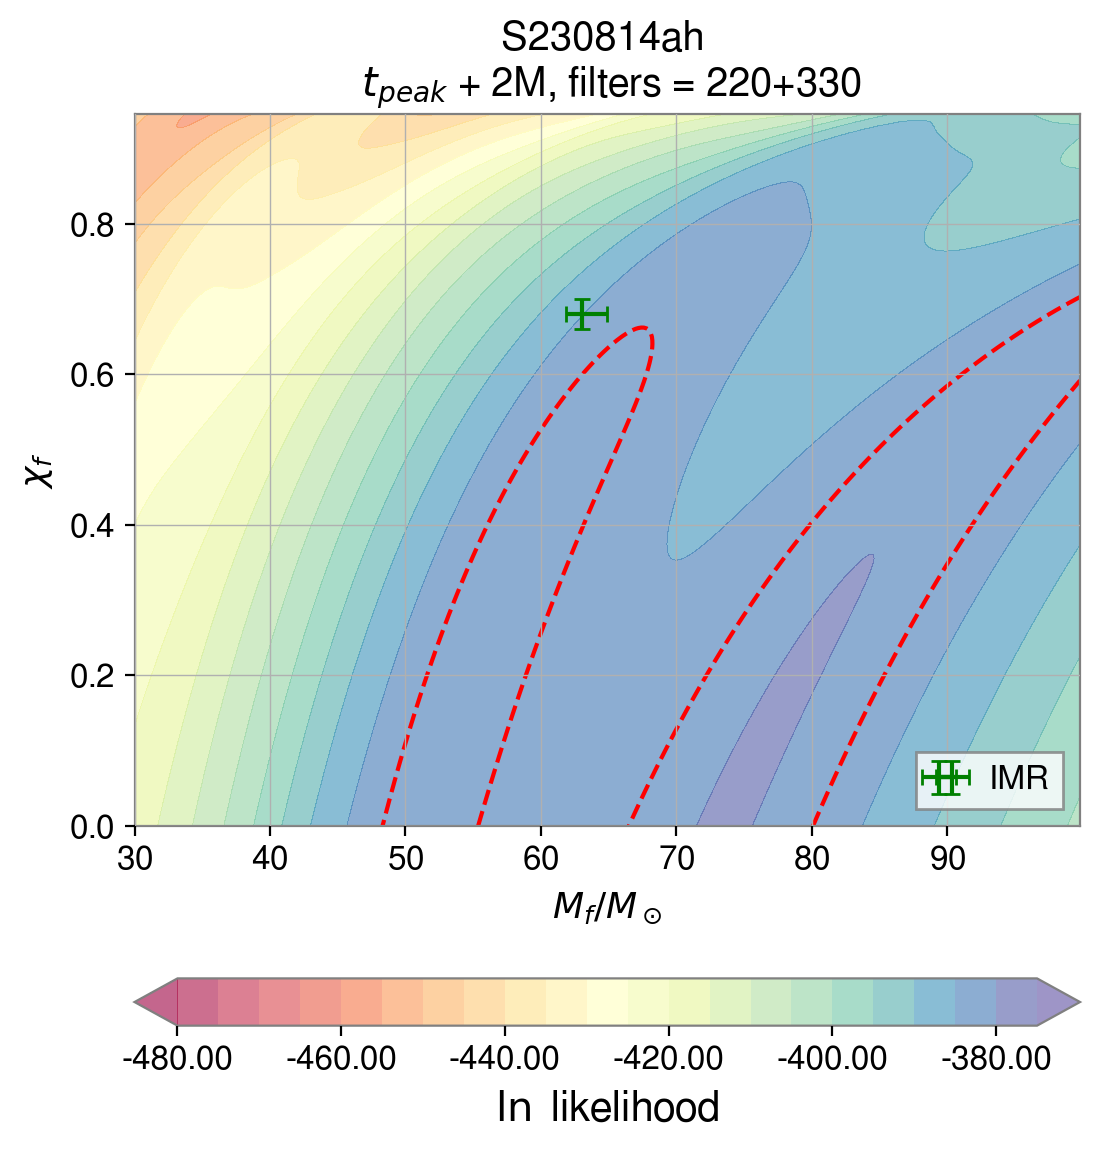

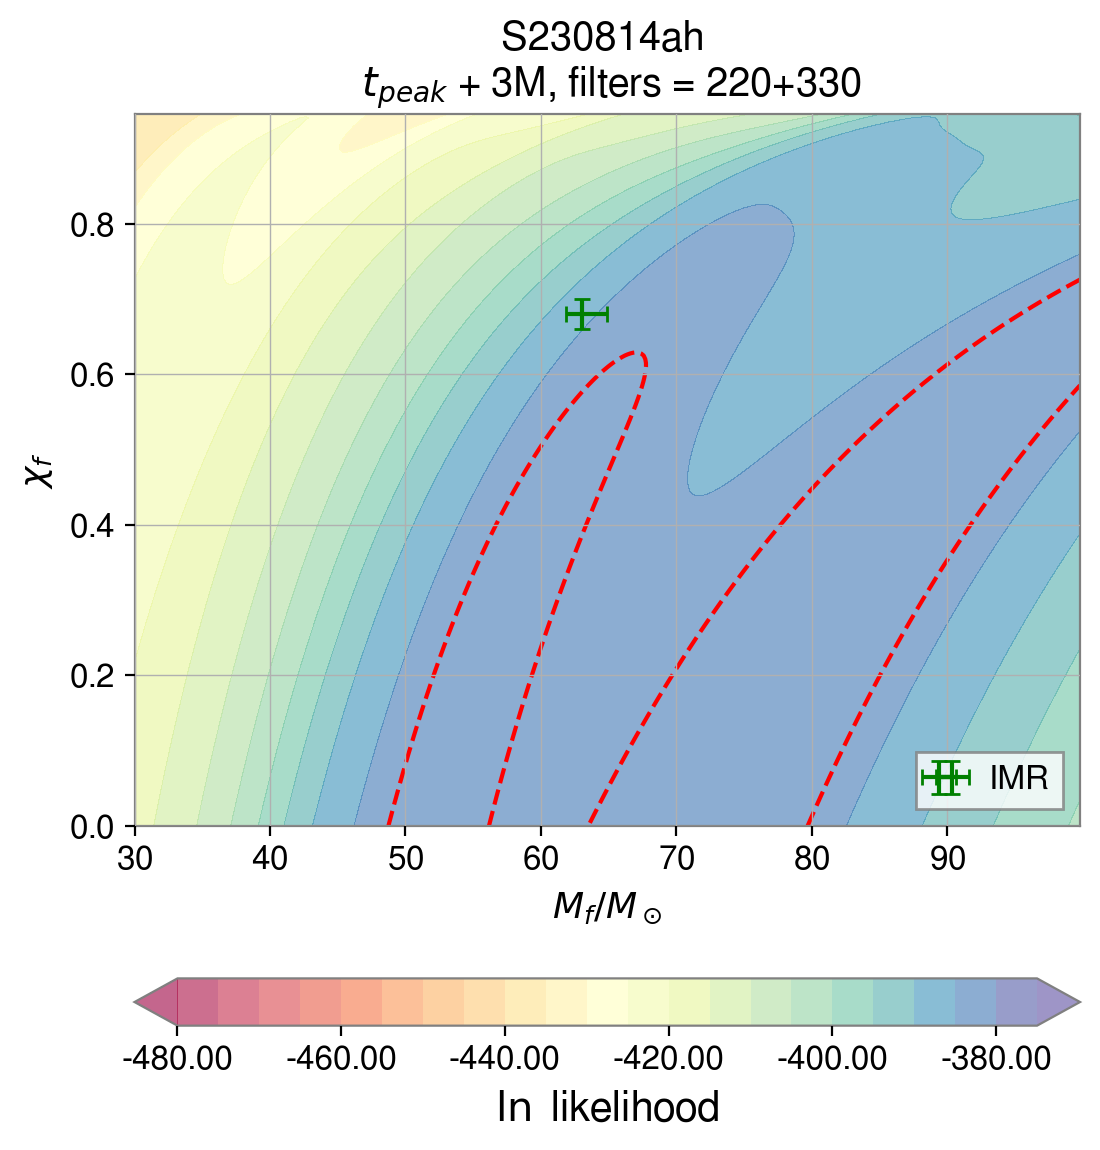

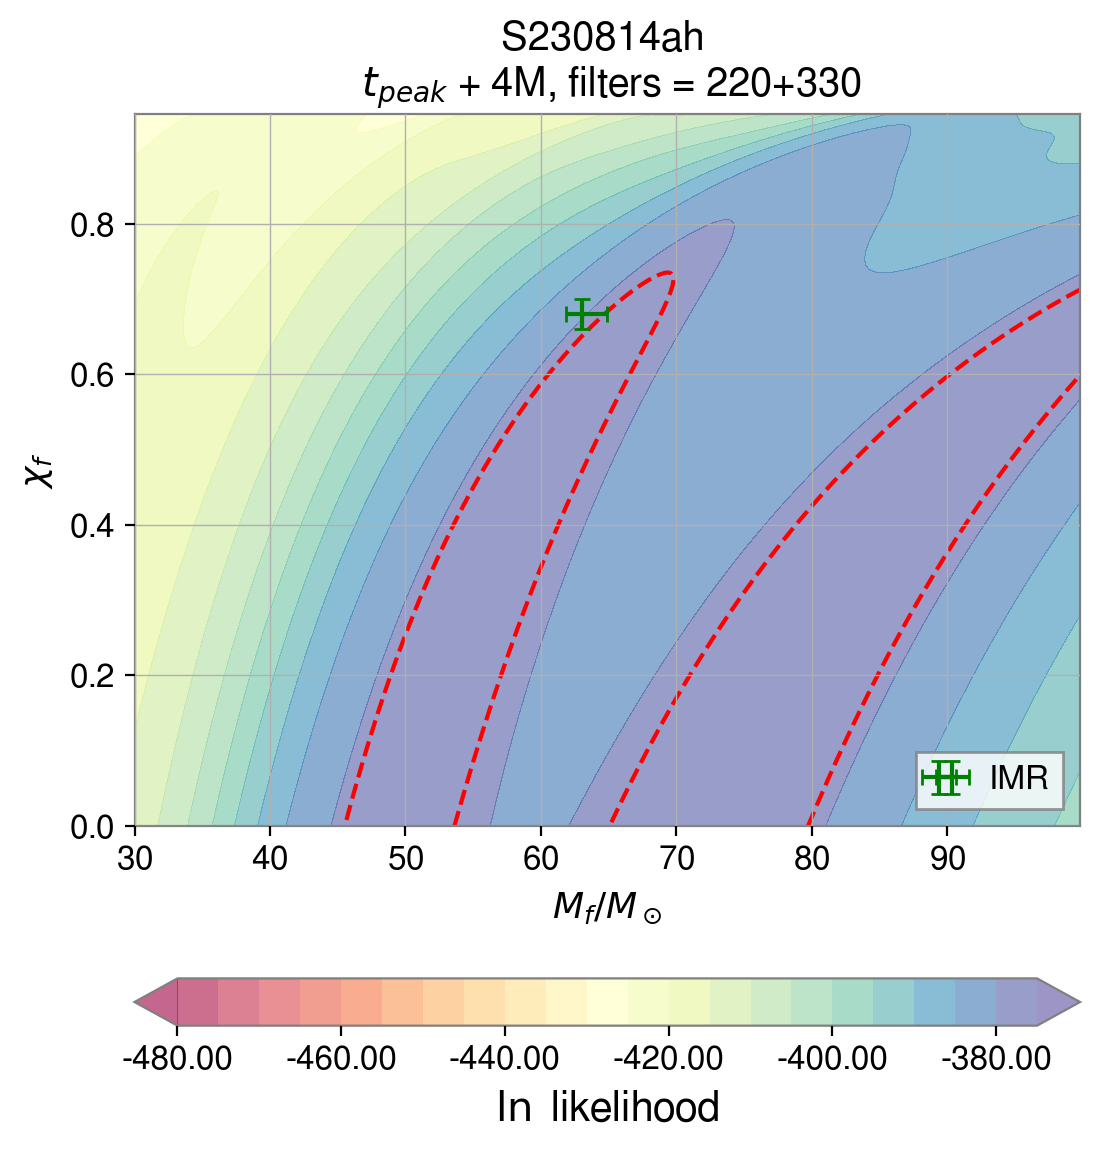

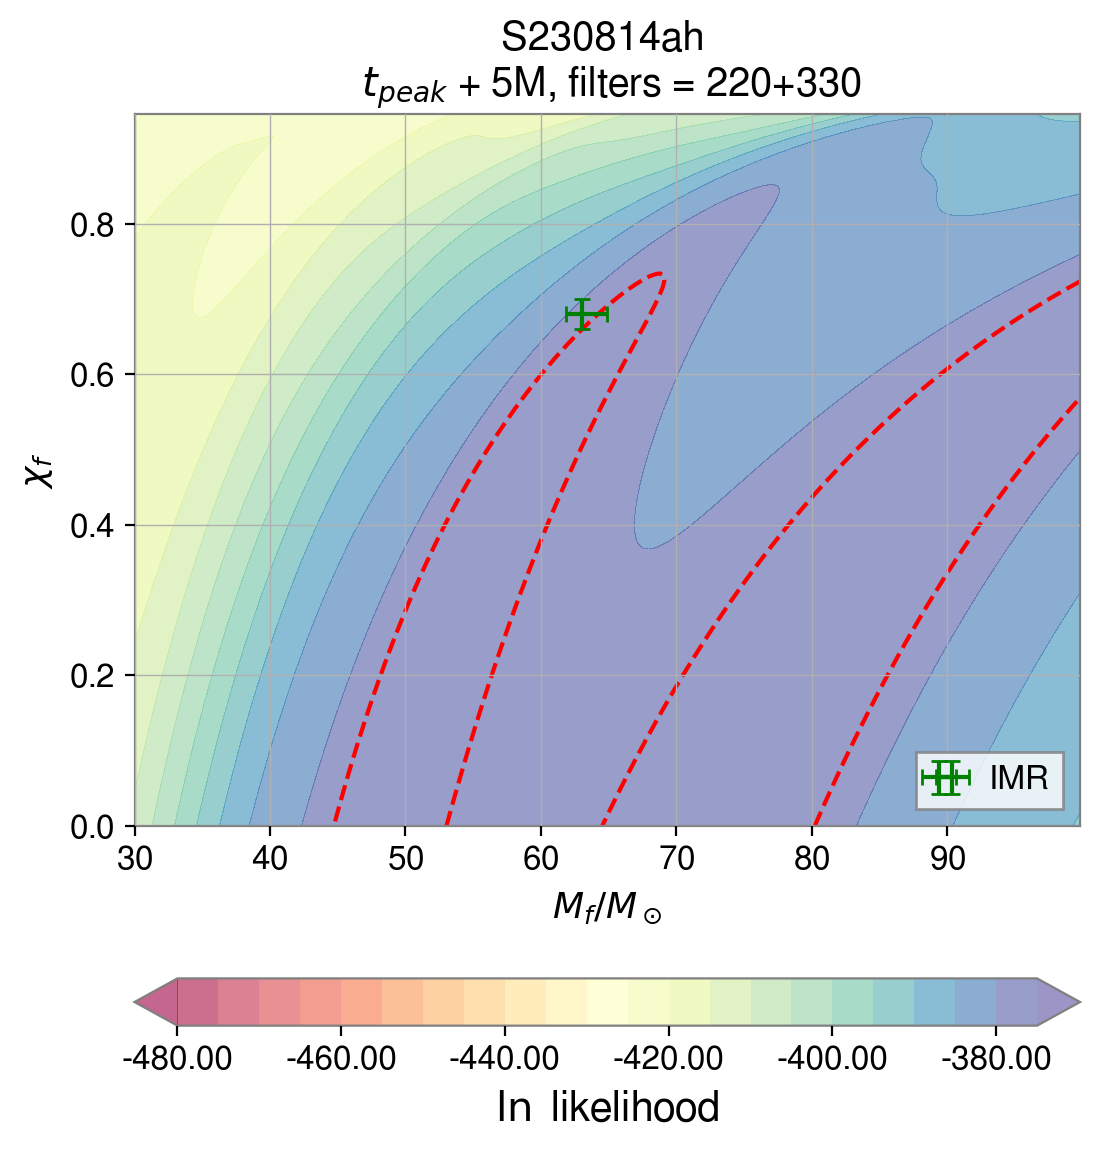

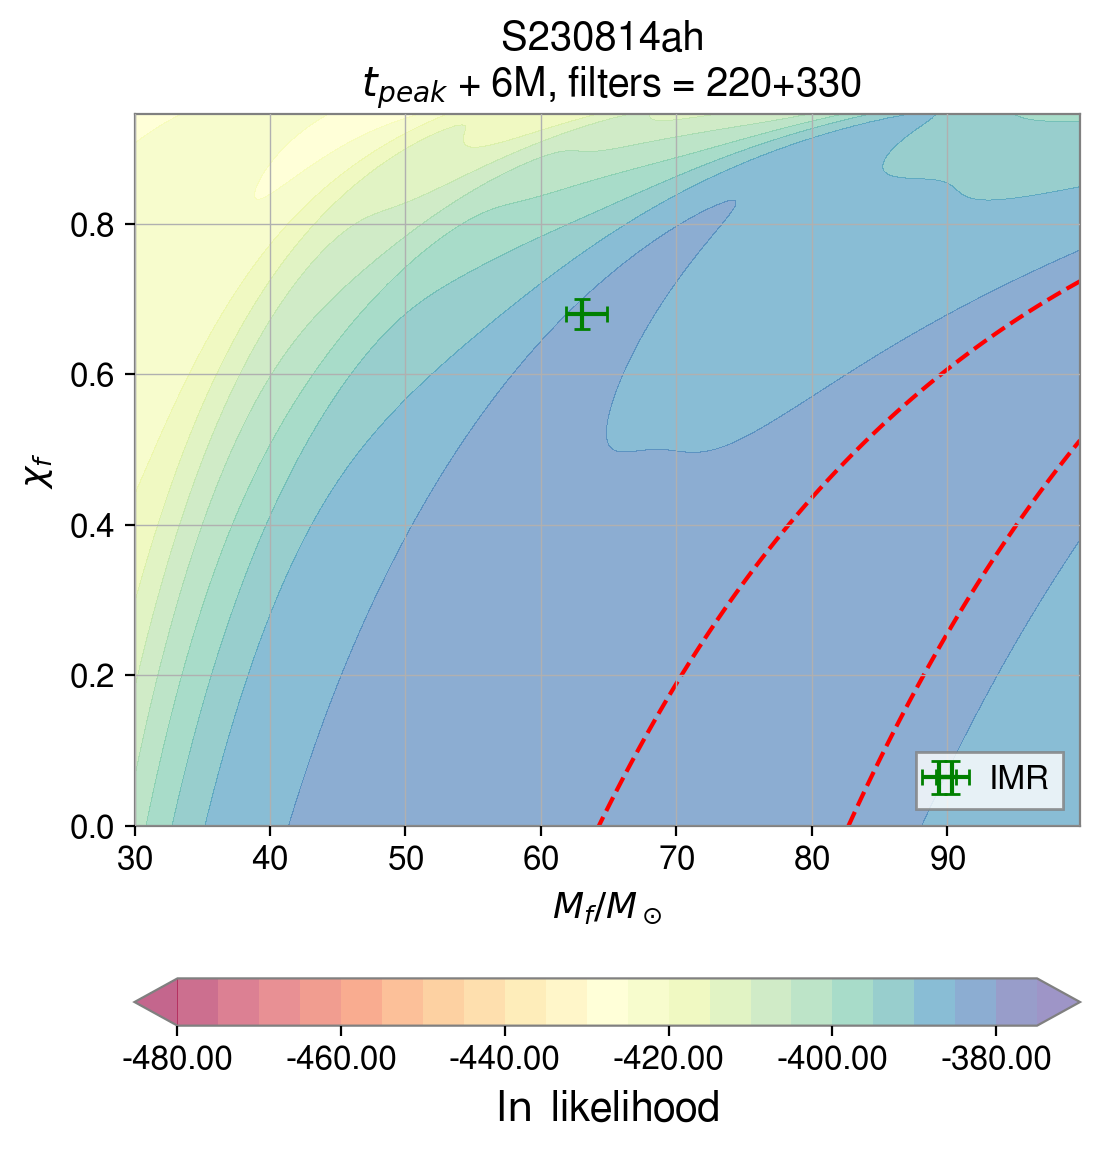

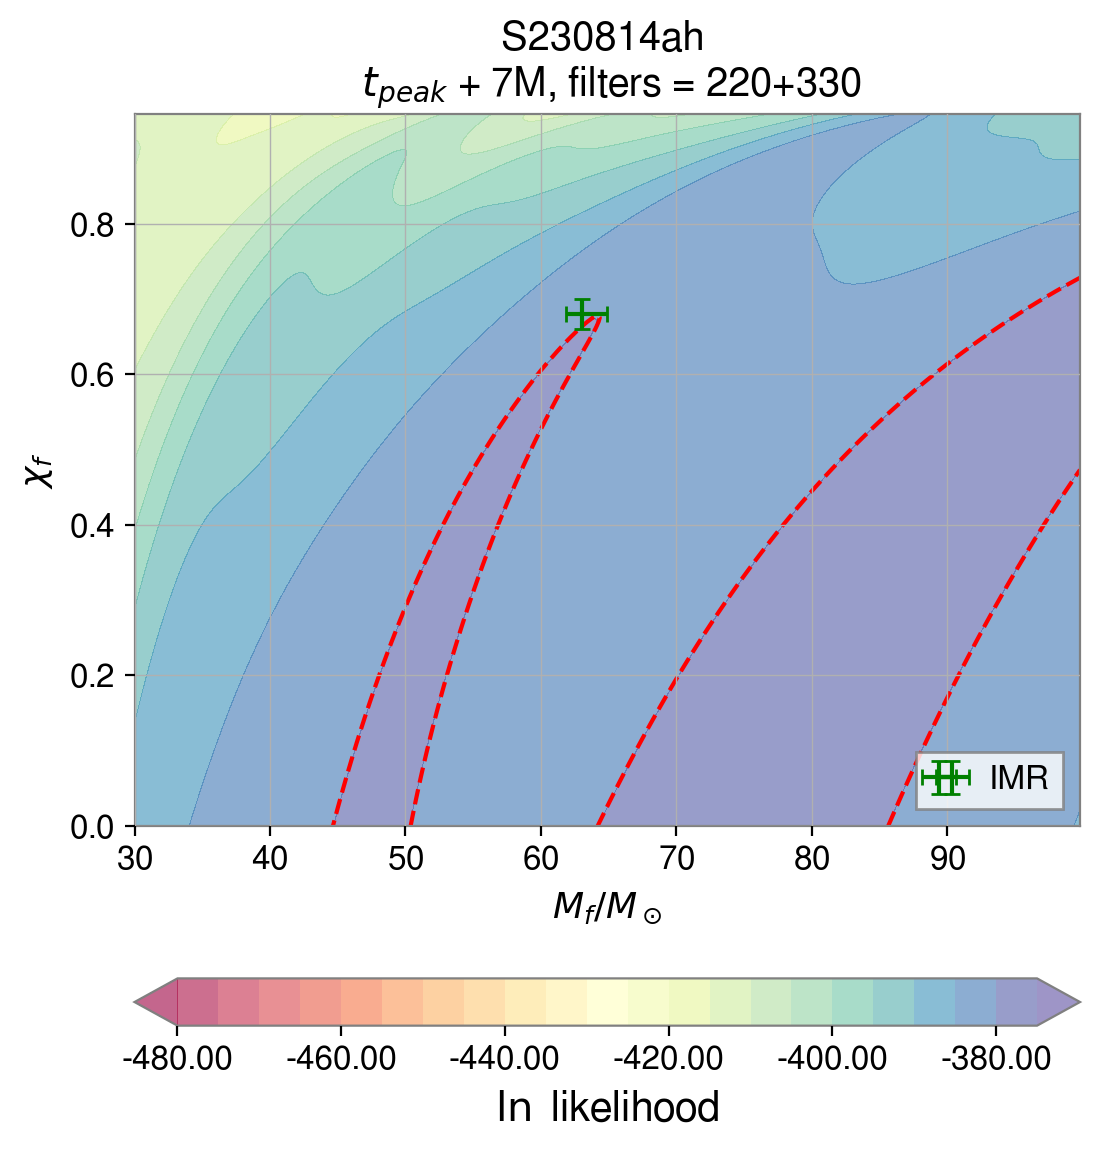

In [77]:
filter_str = '220+330'

for i in range(8):
    file_name = filter_str+'_t={}M.txt'.format(i)
    time_str = str(i)
    
    likelihood_data = np.loadtxt(results_dir+filter_str+'/'+file_name)
    evidence = logsumexp(likelihood_data)
    credible_region = qnm_filter.find_credible_region(likelihood_data, num_cpu=9)

    pl.rc('figure', figsize=(6.1, 6.6))
    fig, ax = pl.subplots()
    contours = ax.contourf(mass_grid, chi_grid, likelihood_data, 20, 
                           cmap='Spectral', levels = cbar_levels, extend='both',
                           origin='lower', alpha=0.6, linestyles='--')
    dotted = ax.contour(mass_grid, chi_grid, likelihood_data, [credible_region], colors = 'red', \
                       linestyles ='--')
    ax.errorbar(x=IMR_analysis[0], y=IMR_analysis[1], xerr=IMR_analysis[2], yerr=IMR_analysis[3], 
               capsize = 3, c='g', label='IMR')
    # ax.plot(np.NaN, np.NaN, '-', color='none', label='ln(Evidence) = %.1F' % evidence)


    # coloarbar
    cbar=fig.colorbar(contours, orientation="horizontal", 
                      pad=0.15, format='%3.2f')
    cbar.set_label(r'$\ln$ likelihood', fontsize=15)
    cbar.set_ticks(cbar_levels[::4])

    pl.xlabel(r'$M_f/M_\odot$', fontsize=13)
    pl.ylabel(r'$\chi_f$', fontsize=13)
    pl.legend(loc = 'lower right')
    ax.set_title('S230814ah \n $t_{peak}$ + ' + time_str +
                 'M, filters = ' + filter_str)
    pl.savefig('./remade_imgs/{}/{}_t={}M.png'.format(
        filter_str, filter_str, time_str))

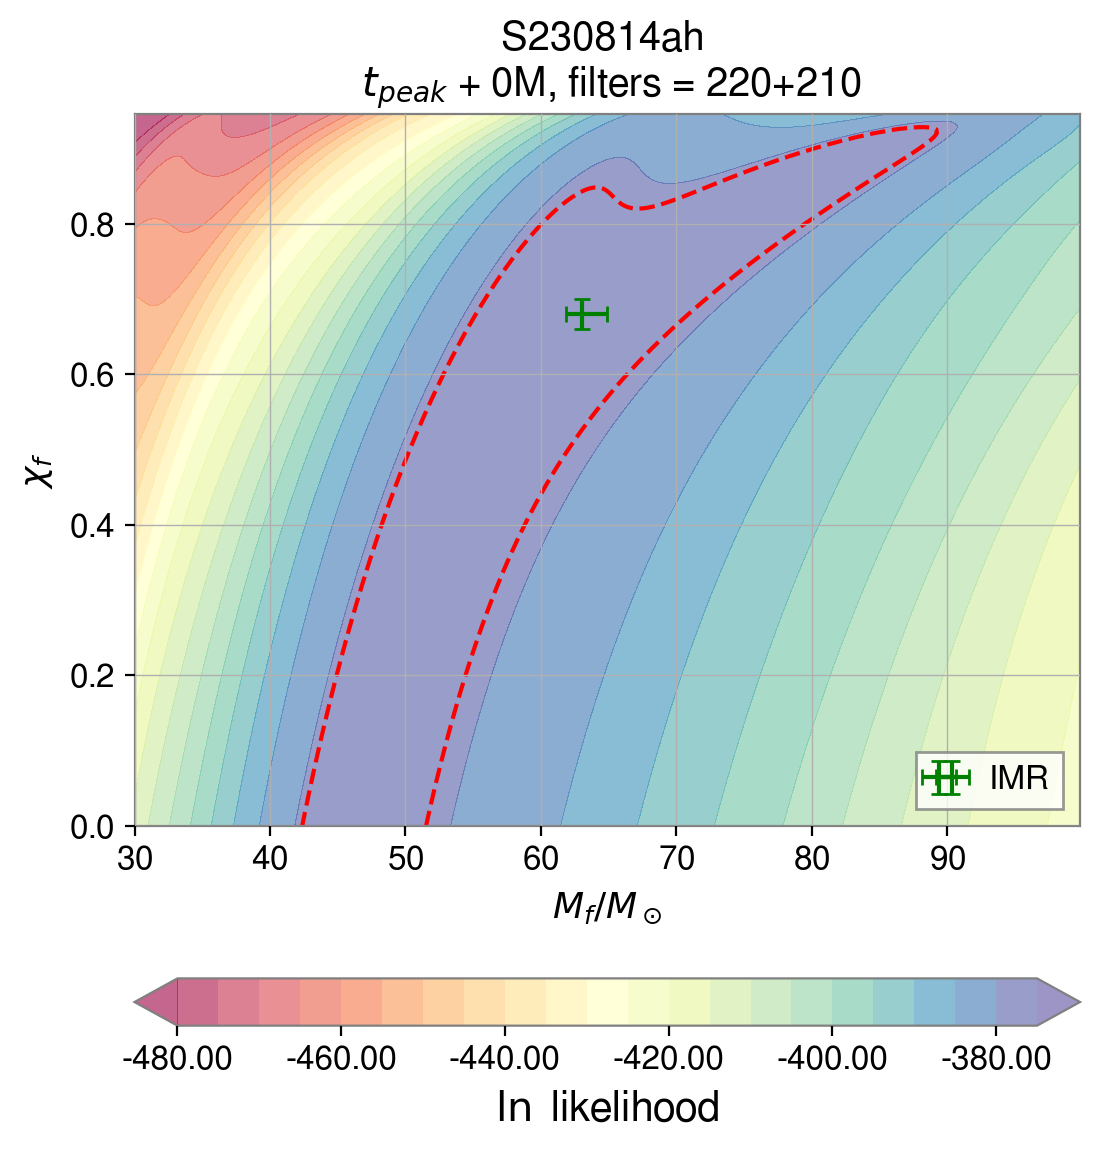

In [79]:
filter_str = '220+210'

for i in range(1):
    file_name = filter_str+'_t={}M.txt'.format(i)
    time_str = str(i)
    
    likelihood_data = np.loadtxt(results_dir+filter_str+'/'+file_name)
    evidence = logsumexp(likelihood_data)
    credible_region = qnm_filter.find_credible_region(likelihood_data, num_cpu=9)

    pl.rc('figure', figsize=(6.1, 6.6))
    fig, ax = pl.subplots()
    contours = ax.contourf(mass_grid, chi_grid, likelihood_data, 20, 
                           cmap='Spectral', levels = cbar_levels, extend='both',
                           origin='lower', alpha=0.6, linestyles='--')
    dotted = ax.contour(mass_grid, chi_grid, likelihood_data, [credible_region], colors = 'red', \
                       linestyles ='--')
    ax.errorbar(x=IMR_analysis[0], y=IMR_analysis[1], xerr=IMR_analysis[2], yerr=IMR_analysis[3], 
               capsize = 3, c='g', label='IMR')
    # ax.plot(np.NaN, np.NaN, '-', color='none', label='ln(Evidence) = %.1F' % evidence)


    # coloarbar
    cbar=fig.colorbar(contours, orientation="horizontal", 
                      pad=0.15, format='%3.2f')
    cbar.set_label(r'$\ln$ likelihood', fontsize=15)
    cbar.set_ticks(cbar_levels[::4])

    pl.xlabel(r'$M_f/M_\odot$', fontsize=13)
    pl.ylabel(r'$\chi_f$', fontsize=13)
    pl.legend(loc = 'lower right')
    ax.set_title('S230814ah \n $t_{peak}$ + ' + time_str +
                 'M, filters = ' + filter_str)
    pl.savefig('./remade_imgs/{}/{}_t={}M.png'.format(
        filter_str, filter_str, time_str))